<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Dataset_Operaciones_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [3]:
# Loading the CSV file as dataframe
Operación_df = pd.read_csv("./data/Dataset_Ventas.csv", encoding="ISO-8859-1")

In [4]:
# Showing dataframe dimensions
Operación_df.shape

(10092, 12)

In [5]:
# Showing column types
Operación_df.dtypes

Factura                                           int64
Fecha de contabilización                         object
Nombre de cliente/proveedor                      object
Nombre de empleado del departamento de ventas    object
Descripción artículo/serv.                       object
LOTE                                             object
Ciudad                                           object
Cantidad                                          int64
Precio Unitario                                   int64
Total líneas                                      int64
Impuesto total                                    int64
Número de referencia del SN                      object
dtype: object

In [6]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
Operación_df.sample(10) # Showing a sample of n rows

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN
4593,36855,26/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
7816,40718,09/09/2022,WEISS PHARMA SAS,EVELYN YURANY GOMEZ BARON,IVERMECTINA,202107048,NaN,1,1200000,1200000,0,2696
497,611,31/01/2020,LABORATORIOS VM SAS,JENNY MAGALY GONZALEZ FLOREZ,SALDOS INICIAL 01-31-2020,NaN,NaN,0,5850000,5850000,0,FE 0FE33116
518,203,31/01/2020,COMPAÑIA CALIFORNIA S.A.,YENNY PATRICIA MORALES BENITEZ,SALDOS INICIAL 01-31-2020,NaN,NaN,0,16990050,16990050,0,FE 0FE32633
534,560,31/01/2020,LABORATORIOS VETERLAND LTDA,JENNY MAGALY GONZALEZ FLOREZ,SALDOS INICIAL 01-31-2020,NaN,NaN,0,2524236,2524236,0,FE 00035211
6437,42143,06/07/2023,PHARMAPRIM SAS,JENNY MAGALY GONZALEZ FLOREZ,ENROFLOXACINA BASE,230104-1,NaN,25,200000,5000000,0,6072023
7949,40440,11/07/2022,COLVET S.A.S,JENNY MAGALY GONZALEZ FLOREZ,FENBENDAZOL MICRONIZADO (ALIVIRA),ASA002834A,BOGOTA,350,230000,80500000,0,785
5623,38317,17/06/2021,LABORATORIOS VETERLAND LTDA,JENNY MAGALY GONZALEZ FLOREZ,ENROFLOXACINA BASE,210125-1,BOGOTA,75,135000,10125000,0,12459
2497,38377,29/06/2021,IVF DE COLOMBIA SAS,LINA PAOLA CRISOSTOMO DIAZ,ACIDO ACETIL SALICILICO,5002200000000,BOGOTA,25,22000,550000,104500,2100518
8330,40324,16/06/2022,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,PANTOTENATO DE CALCIO,FSG-202006033,YUMBO,50,100000,5000000,0,2002432


## 1. Verificar Caliad de los datos

In [7]:
!pip install pylev

In [8]:
import re
from random import randint
from datetime import datetime
from difflib import SequenceMatcher

import numpy as np
import pandas as pd

import pylev

## Detectando duplicados sobre las columnas

In [9]:
duplicados = Operación_df[Operación_df.duplicated(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep=False)]
duplicados.sort_values(by=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], ascending=True).head(10)

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN
2443,35751,17/04/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,AMPICILINA SODICA POLVO ESTERIL,2005200465,BOGOTA,1,450000,450000,85500,4145
2444,35751,17/04/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,AMPICILINA SODICA POLVO ESTERIL,2005200465,BOGOTA,1,450000,450000,85500,4145
3565,36753,07/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
3566,36753,07/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
4593,36855,26/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
4594,36855,26/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
2251,37131,02/12/2020,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,VITAMINA E ALFA TOCOFEROL ACETATO,01200508EJ,YUMBO,20,85000,1700000,0,10101
2252,37131,02/12/2020,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,VITAMINA E ALFA TOCOFEROL ACETATO,01200508EJ,YUMBO,20,85000,1700000,0,10101
4344,37831,05/04/2021,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (HEMANI),15,BOGOTA,1000,42000,42000000,0,4692
4345,37831,05/04/2021,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (HEMANI),15,BOGOTA,1000,42000,42000000,0,4692


In [10]:
Operación_df = Operación_df.drop_duplicates(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep='first')

In [11]:
# Lista de columnas que quieres considerar para buscar duplicados
columnas_a_verificar = ['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE']

# Encuentra las filas duplicadas basadas en las columnas especificadas
duplicados = Operación_df[Operación_df.duplicated(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep=False)]

duplicados.sort_values(by=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], ascending=True).head(10)

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN


In [12]:
Operación_df.shape

(10069, 12)

## Validando que la Columna Total lineas este correcta

In [13]:
Operación_df['Cantidad'] = pd.to_numeric(Operación_df['Cantidad'], errors='coerce')
Operación_df['Precio Unitario'] = pd.to_numeric(Operación_df['Precio Unitario'], errors='coerce')
Operación_df['Total líneas'] = pd.to_numeric(Operación_df['Total líneas'], errors='coerce')

In [15]:
multiplicacion = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

# Compara los resultados con la columna 'Total Líneas'
comparacion = multiplicacion == Operación_df['Total líneas']

# Verifica si todos los valores son True (correctos)
es_correcto = comparacion.all()

# Muestra el resultado
if es_correcto:
    print("Los valores en 'Total Líneas' son correctos.")
else:
    print("Al menos un valor en 'Total Líneas' no es correcto.")

Al menos un valor en 'Total Líneas' no es correcto.


In [16]:
Operación_df['Total líneas'] = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

In [17]:
multi_df = Operación_df
# Calcular la multiplicación de 'Cantidad' por 'Precio Unitario'
multiplicacion = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

# Compara los resultados con la columna 'Total Líneas' y crea una columna 'Es Correcto' en el DataFrame
multi_df['Es Correcto'] = multiplicacion == Operación_df['Total líneas']

filas_incorrectas = multi_df[multi_df['Es Correcto'] == False]

# Filtra las filas donde 'Es Correcto' es False
sample_filas_incorrectas = filas_incorrectas.sample(min(0, len(filas_incorrectas)))

In [18]:
sample_filas_incorrectas.sample(len(sample_filas_incorrectas))

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN,Es Correcto


## 2. Univariate analysis

## Nombre de cliente/proveedor

In [19]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
Operación_df["Nombre de cliente/proveedor"].nunique()

307

In [20]:
# Showing unique values of neighbourhoods
Operación_df["Nombre de cliente/proveedor"].unique()

array(['DUARTE RODRIGUEZ WILLIAM MOISES', 'PRODIA SAS', 'COASPHARMA SAS',
       'BELL CHEM INTERNACIONAL SAS', 'COMPAÑIA CALIFORNIA S.A.',
       'LABORATORIOS ROLDY VETERINARIA LIMITADA',
       'JIR PRODUCTOS QUIMICOS SAS',
       'PRODUCTOS MEDICOS VETERINARIOS S.A.', 'NOVALFARM LTDA',
       'BIOSTAR PHARMACEUTICAL S.A.', 'LABORATORIOS VM SAS',
       'VICAR FARMACEUTICA S.A.', 'LABORATORIOS TIERWELT SAS',
       'VECOL S.A.',
       'CARIBBEAN SUNRISE LABORATORIOS M&F CHEMICAL´ S S.A.S',
       'IMPORTADORA Y DISTRIBUIDORA DE SUMISTROS SAS',
       'EMPRESA DE COSMETICOS Y SERVICIOS SA', 'AGROZ S.A.',
       'BIOTECNO ZF SAS',
       'GVM CORPORATION GLOBAL VETERINARY MEDICINE S A S',
       'BIOCHEM FARMACEUTICA DE COLOMBIA S.A.', 'OPTI-VET LTDA',
       'QUIMICA INTERKROL LTDA', 'LABORATORIOS ZOO SAS', 'FARMATEC LTDA',
       'ADVANCEPHARMA S.A.S', 'LABORATORIOS GENERALES SAN PEDRO SAS',
       'LABORATORIOS SERVINSUMOS S A', 'CHEMICAL SERVICES SAS',
       'BEST AMAZON EXPORT 

In [21]:
# Calculating the relative frecuency of room types
Operación_df["Nombre de cliente/proveedor"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

LABORATORIOS EDO SAS              0.071705
LABORATORIOS VETERLAND LTDA       0.060085
KYROVET LABORATORIES S.A.         0.045387
LABORATORIOS VM SAS               0.041514
COASPHARMA SAS                    0.033568
                                    ...   
PRODUCTOS DROGAM S.A.S            0.000099
FYAPAC SAS                        0.000099
ELITE NISSIM Y CIA S EN C         0.000099
GONZALEZ MURCIA CARLOS EDUARDO    0.000099
QUIMICA M.G. SAS                  0.000099
Name: Nombre de cliente/proveedor, Length: 307, dtype: float64

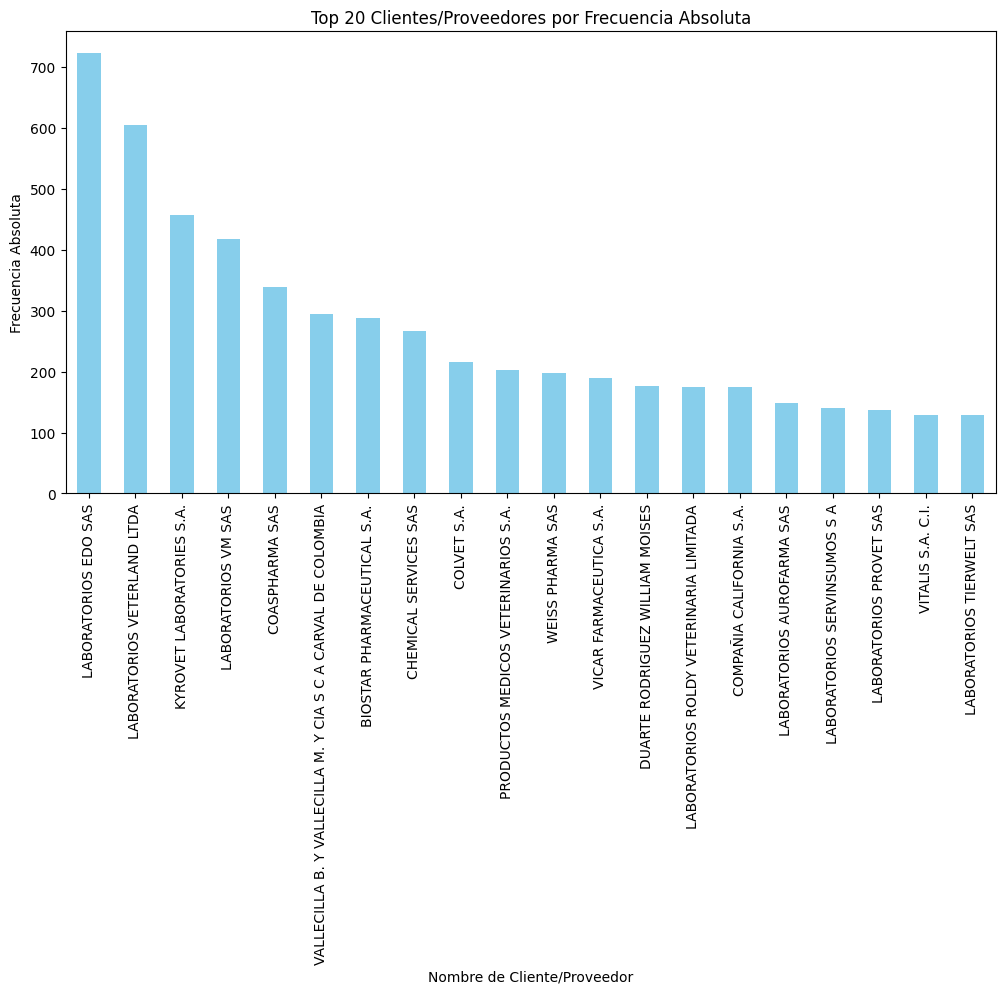

In [22]:
# Calcula la frecuencia de cada valor en la columna 'Nombre de cliente/proveedor'
frecuencia_clientes = Operación_df['Nombre de cliente/proveedor'].value_counts()

# Selecciona los 20 valores principales
top_20_clientes = frecuencia_clientes.head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
top_20_clientes.plot(kind='bar', color='skyblue')
plt.title("Top 20 Clientes/Proveedores por Frecuencia Absoluta")
plt.xlabel("Nombre de Cliente/Proveedor")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mayor legibilidad

plt.show()

In [23]:
Operación_df['Nombre de cliente/proveedor'].mode()

0    LABORATORIOS EDO SAS
Name: Nombre de cliente/proveedor, dtype: object

## Descripción artículo/serv.

In [25]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
Operación_df["Descripción artículo/serv."].nunique()

238

In [26]:
# Showing unique values of neighbourhoods
Operación_df["Descripción artículo/serv."].unique()

array(['CIPROFLOXACINA HCL', 'SALDOS INICIAL 01-31-2020',
       'DIPIRONA SODICA', 'OXITETRACICLINA BASE INYECTABLE',
       'VITAMINA E ALFA TOCOFEROL ACETATO (BASF)', 'NICOTINAMIDA',
       'PAMOATO DE PIRANTEL', 'ANTIPIRINA', 'TRICLABENDAZOL MICRONIZADO',
       'MENTOL CRISTALES', 'PAMOATO DE OXANTEL', 'ALBENDAZOL MICRONIZADO',
       'ETHION TECNICO (HEMANI)', 'TILMICOSIN FOSFATO 75%',
       'DIMINACENE DIACETURATO', 'TYLOSINA TARTRATO POLVO',
       'AMITRAZ TECNICO', 'STREPTOMICINA SULFATO ESTERIL',
       'PAMOATO DE PIRANTEL (IPCA)', 'PRAZIQUANTEL MICRONIZADO',
       'ACIDO ACETIL SALICILICO', 'IVERMECTINA',
       'GENTAMICINA SULFATO ESTERIL', 'METRONIDAZOL BENZOYL MICRONIZADO',
       'PRAZIQUANTEL MICRONIZADO x 2 KG',
       'VITAMINA E ALFA TOCOFEROL ACETATO',
       'OXITETRACICLINA HCL INYECTABLE',
       'TRIMETHOPRIM MICRONIZADO (ANDHRA)', 'OXITETRACICLINA HCL',
       'AMOXICILINA TRIHIDRATO POLVO', 'CEFTIOFUR SODICO ESTERIL',
       'NEOMICINA SULFATO', 'PRAZIQUA

In [27]:
# Calculating the relative frecuency of room types
Operación_df["Descripción artículo/serv."].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

SALDOS INICIAL 01-31-2020                                   0.088489
NICOTINAMIDA                                                0.031781
VITAMINA C - ACIDO ASCORBICO CRISTALES                      0.026120
IVERMECTINA                                                 0.024233
CAFEINA ANHIDRA                                             0.023538
                                                              ...   
ACESULFAME K                                                0.000099
HOMATROPINA METILBROMURO                                    0.000099
ARRENDAMIENTO OFICINA 1004 EDIFICIO ELEMNTO MAR 27 AL 30    0.000099
CEFPODOXIMA PROXETIL                                        0.000099
PREDNISOLONA ACETATO                                        0.000099
Name: Descripción artículo/serv., Length: 238, dtype: float64

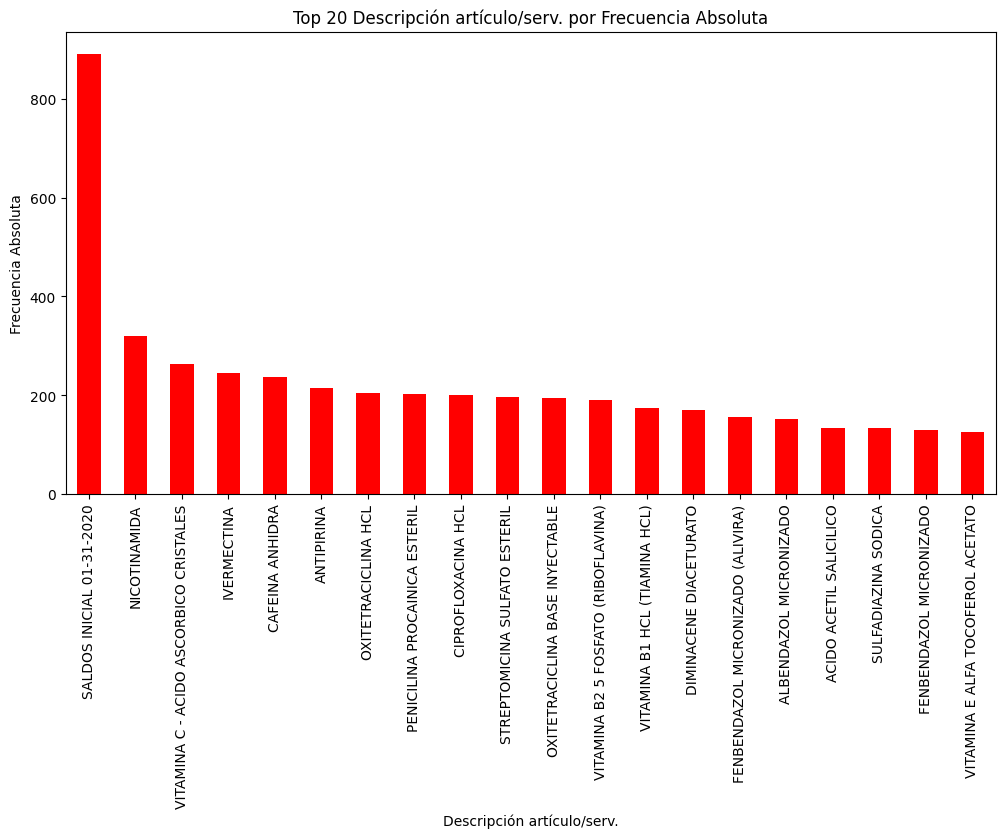

In [28]:
# Calcula la frecuencia de cada valor en la columna 'Descripción artículo/serv.'
frecuencia_clientes = Operación_df['Descripción artículo/serv.'].value_counts()

# Selecciona los 20 valores principales
top_20_clientes = frecuencia_clientes.head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
top_20_clientes.plot(kind='bar', color='red')
plt.title("Top 20 Descripción artículo/serv. por Frecuencia Absoluta")
plt.xlabel("Descripción artículo/serv.")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mayor legibilidad

plt.show()

In [30]:
Operación_df['Descripción artículo/serv.'].mode()

0    SALDOS INICIAL 01-31-2020
Name: Descripción artículo/serv., dtype: object

## Total líneas

In [32]:
# Showing unique values of Total líneas
Operación_df["Total líneas"].nunique()

1578

In [33]:
# Showing unique values of Total líneas
Operación_df["Total líneas"].unique()

array([ 18750000,         0,   4125000, ..., 206500000,   4671000,
        10140000])

In [34]:
# Calculating the relative frecuency of Total líneas
Operación_df["Total líneas"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

0           0.105373
3000000     0.014301
6000000     0.012216
5000000     0.010527
4500000     0.010031
              ...   
37428300    0.000099
37027025    0.000099
63474900    0.000099
50875000    0.000099
10140000    0.000099
Name: Total líneas, Length: 1578, dtype: float64

In [35]:
# Calculating basic statistics of accommodates
Operación_df["Total líneas"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    1.006900e+04
mean     1.393934e+07
std      2.319490e+07
min      0.000000e+00
5%       0.000000e+00
25%      2.300000e+06
50%      5.875000e+06
75%      1.600000e+07
95%      5.410800e+07
max      8.389131e+08
Name: Total líneas, dtype: float64

In [39]:
# Let's make some calculations for determining an outlier threshold
q1 = Operación_df["Total líneas"].quantile(0.25)
q3 = Operación_df["Total líneas"].quantile(0.75)
iqr = q3 - q1

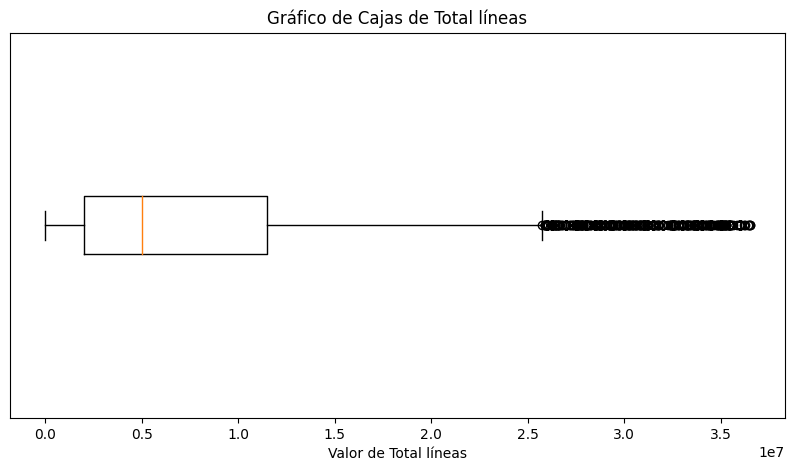

In [40]:
# Filtra los valores de "CANTIDAD" que cumplan con tu condición
data_filtered = Operación_df.loc[Operación_df["Total líneas"] <= (q3 + 1.5 * iqr)]["Total líneas"]

# Crea un gráfico de cajas con los valores filtrados
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False para un gráfico horizontal

# Establece el título y etiquetas de los ejes
plt.title("Gráfico de Cajas de Total líneas")
plt.xlabel("Valor de Total líneas")
plt.yticks([])  # Elimina las etiquetas del eje y (si no deseas mostrarlas)

plt.show()

## CIUDAD

In [42]:
# Showing unique values of Ciudad
Operación_df["Ciudad"].nunique()

58

In [43]:
# Showing unique values of Ciudad
Operación_df["Ciudad"].unique()

array(['BOGOTA', nan, 'ITAGUI', 'TOLIMA', 'TOCANCIPA', 'MEDELLIN',
       'ENVIGADO', 'YUMBO', 'SABANETA', 'COTA', 'JAMUNDÍ', 'CUNDINAMARCA',
       'CARTAGENA', 'CALI', 'FUNZA', 'IPIALES',
       'SAN PEDRO (Valle del Cauca)', 'SOPÓ', 'CHIA', 'FLORIDABLANCA',
       'VALLE', 'JAMUNDI', 'SOPO', 'SAN PEDRO', 'SANTANDER', 'ANTIOQUIA',
       'RIONEGRO', 'BARRANQUILLA', 'PEREIRA', 'LA ESTRELLA',
       'BUCARAMANGA', 'TOCANCIPÁ', 'FUSAGASUGÁ', 'TOCAMCIPA',
       'FLORIDA BLANCA', 'BOGOTÁ', 'CÚCUTA', 'ESPINAL', 'MOSQUERA',
       'TURBO', 'VILLAVICENCIO', 'MEDELLÍN', 'SANTA MARTA', 'SINCELEJO',
       'PAMPLONA', 'GUARNE', 'BUENAVENTURA', 'IBAGUÉ',
       'ARMENIA (Quindío)', 'POPAYÁN', 'MISTRATÓ', 'TENJO', 'YOPAL',
       'SOACHA', 'LA CAPILLA', 'VÉLEZ', 'PALMIRA', 'BELTRÁN', 'MANIZALES'],
      dtype=object)

In [44]:
# Calculating the relative frecuency of room types
Operación_df["Ciudad"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

BOGOTA                         0.496673
NaN                            0.182143
YUMBO                          0.085411
CHIA                           0.023935
CALI                           0.023240
TOCANCIPA                      0.022644
FUNZA                          0.016288
COTA                           0.015592
SOPO                           0.011322
TOCANCIPÁ                      0.011223
MOSQUERA                       0.010627
CUNDINAMARCA                   0.008044
BOGOTÁ                         0.008044
FLORIDA BLANCA                 0.006455
SABANETA                       0.006356
SAN PEDRO (Valle del Cauca)    0.005760
SOPÓ                           0.004966
FLORIDABLANCA                  0.004767
JAMUNDÍ                        0.004370
MEDELLÍN                       0.003973
JAMUNDI                        0.003476
TENJO                          0.003079
SAN PEDRO                      0.003079
IPIALES                        0.002979
VALLE                          0.002880


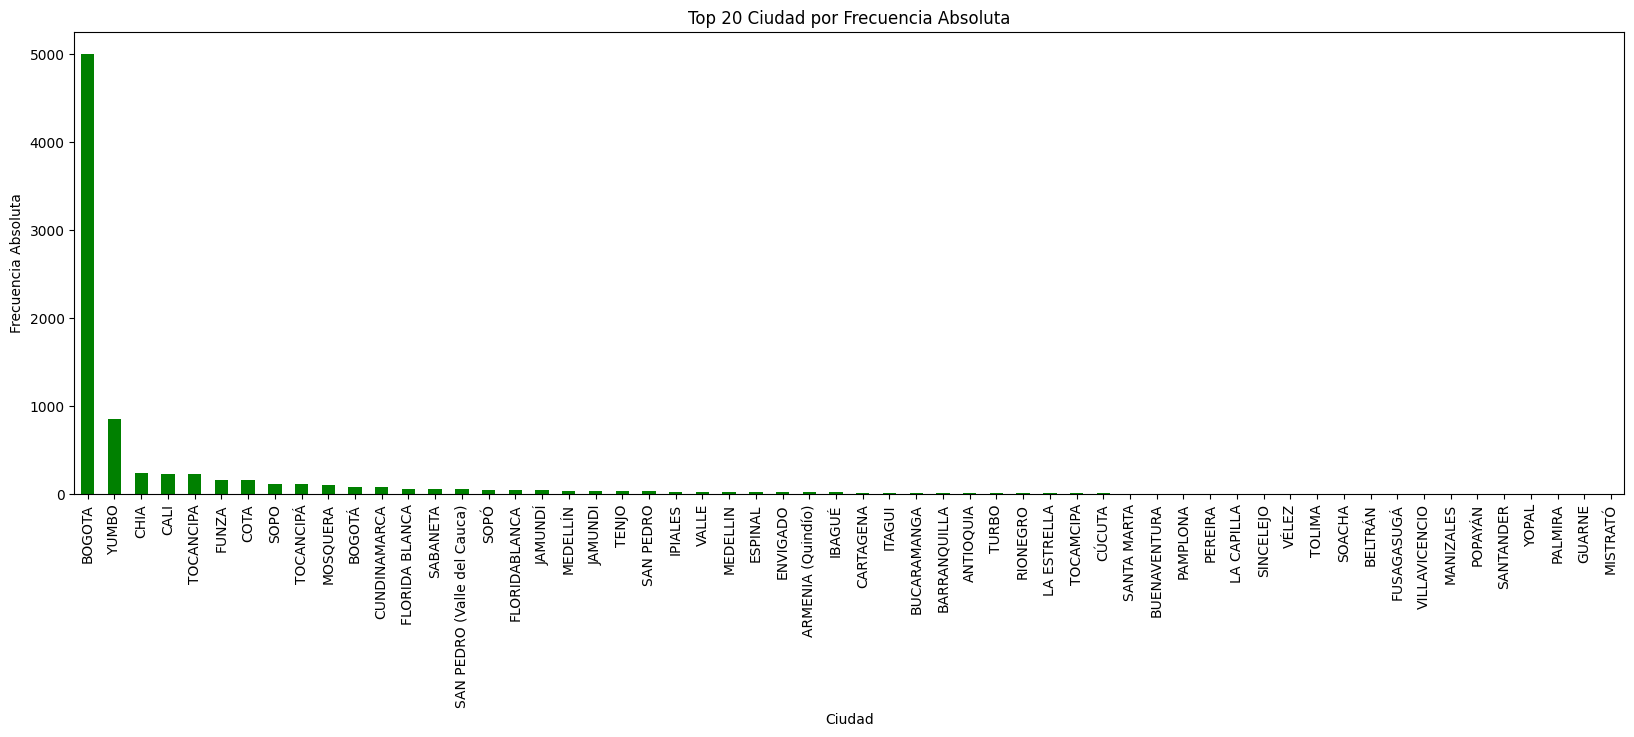

In [46]:
# Calcula la frecuencia de cada valor en la columna Ciudad
frecuencia_clientes = Operación_df['Ciudad'].value_counts()

# Selecciona los 20 valores principales
top_20_clientes = frecuencia_clientes.head(58)

# Crea el gráfico de barras
plt.figure(figsize=(20, 6))
top_20_clientes.plot(kind='bar', color='green')
plt.title("Top 20 Ciudad por Frecuencia Absoluta")
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mayor legibilidad

plt.show()

## 2. Bivariate analysis

<ipython-input-49-e0d11f83d234>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ciudad', y='Total líneas', data=Operación_df, ci=None)  # ci=None para desactivar el intervalo de confianza


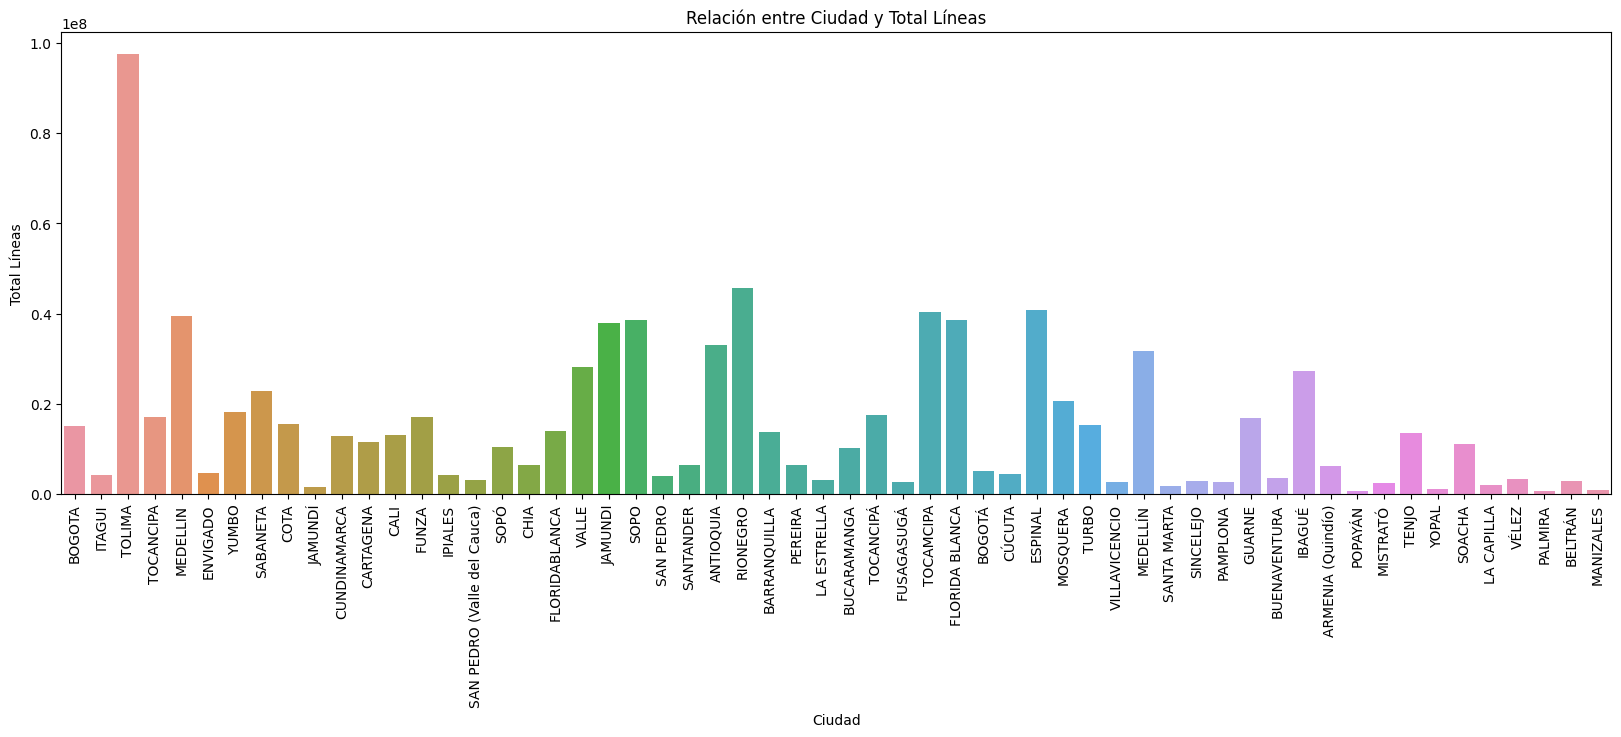

In [49]:
# Crear un gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x='Ciudad', y='Total líneas', data=Operación_df, ci=None)  # ci=None para desactivar el intervalo de confianza

# Títulos y etiquetas
plt.title("Relación entre Ciudad y Total Líneas")
plt.xlabel("Ciudad")
plt.ylabel("Total Líneas")

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

<ipython-input-58-3dbbceaba638>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Total líneas', y='Nombre de cliente/proveedor', data=top_20_clientes, ci=None)  # ci=None para desactivar el intervalo de confianza


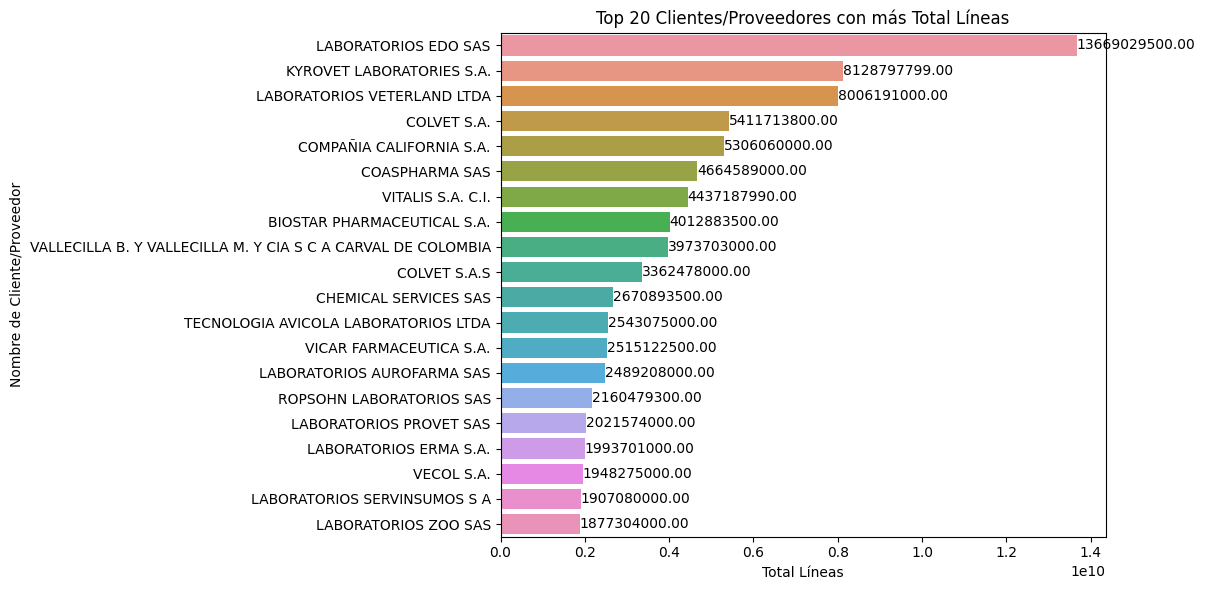

In [58]:
# Obtener los 20 primeros clientes/proveedores con más "Total Líneas"
top_20_clientes = Operación_df.groupby('Nombre de cliente/proveedor')['Total líneas'].sum().nlargest(20).reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total líneas', y='Nombre de cliente/proveedor', data=top_20_clientes, ci=None)  # ci=None para desactivar el intervalo de confianza

# Títulos y etiquetas
plt.title("Top 20 Clientes/Proveedores con más Total Líneas")
plt.xlabel("Total Líneas")
plt.ylabel("Nombre de Cliente/Proveedor")

# Añadir los valores dentro de la barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center')

# Ajustar el espacio entre las barras para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

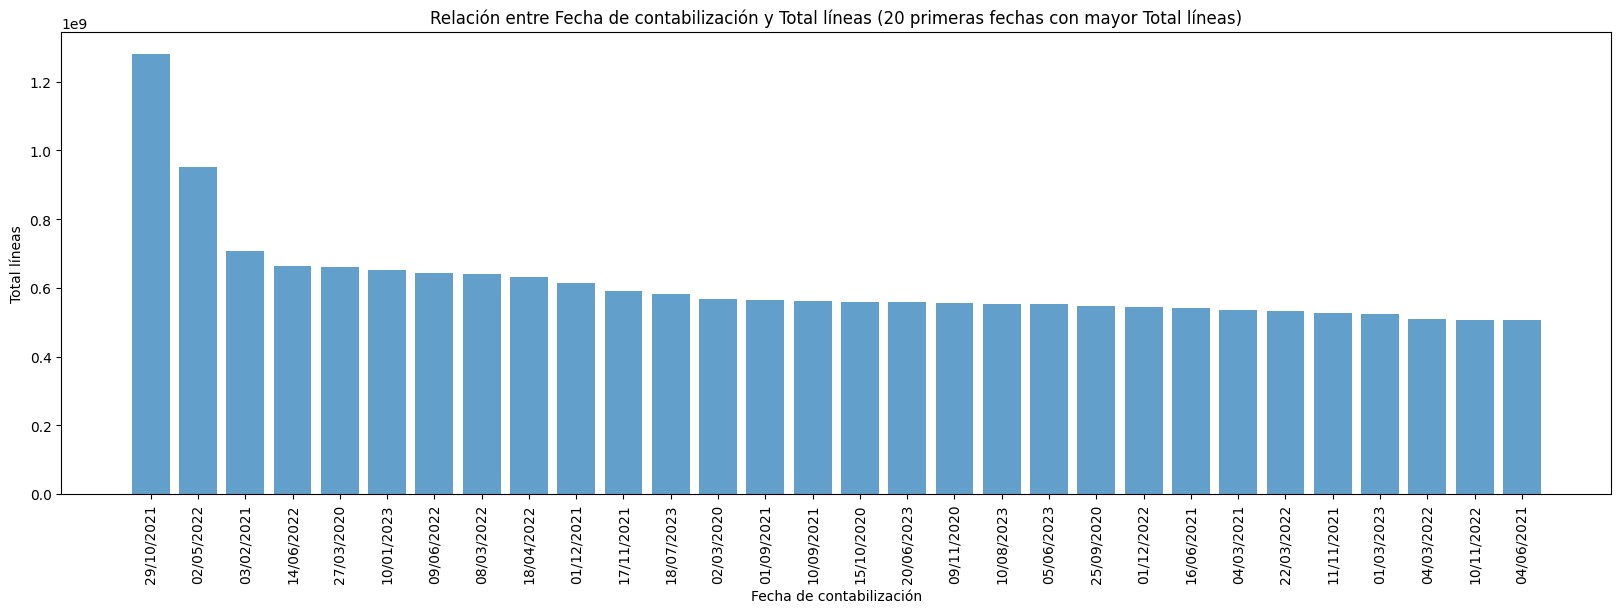

In [62]:
# Agrupar por fecha de contabilización y calcular la suma de Total líneas
agrupado = Operación_df.groupby('Fecha de contabilización')['Total líneas'].sum()

# Ordenar el DataFrame agrupado por la suma de Total líneas en orden descendente
agrupado_sorted = agrupado.sort_values(ascending=False)

# Obtener las 20 primeras fechas de contabilización después de ordenar
primeras_fechas = agrupado_sorted.head(30)

# Crear un gráfico de barras verticales
plt.figure(figsize=(20, 6))
plt.bar(primeras_fechas.index, primeras_fechas.values, align='center', alpha=0.7)
plt.xlabel('Fecha de contabilización')
plt.ylabel('Total líneas')
plt.title('Relación entre Fecha de contabilización y Total líneas (20 primeras fechas con mayor Total líneas)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()

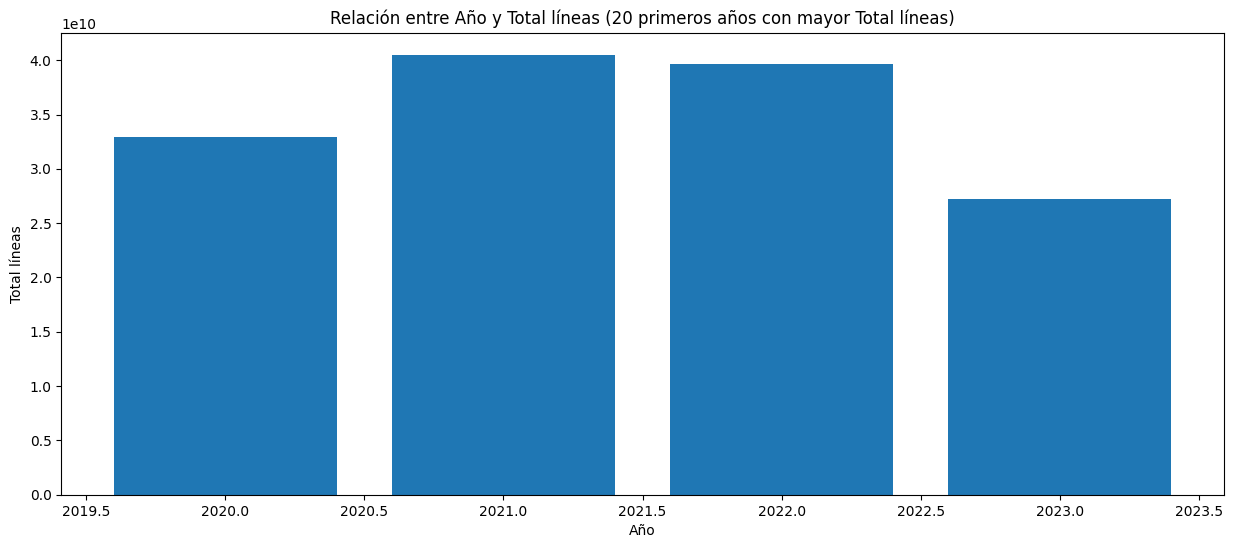

In [67]:
# Extraer el año de la columna Fecha de contabilización
Operación_df['Año'] = pd.to_datetime(Operación_df['Fecha de contabilización'], format='%d/%m/%Y').dt.year

# Agrupar por año y calcular la suma de Total líneas
agrupado = Operación_df.groupby('Año')['Total líneas'].sum()

# Ordenar el DataFrame agrupado por la suma de Total líneas en orden descendente
agrupado_sorted = agrupado.sort_values(ascending=False)

# Obtener las 20 primeras fechas de contabilización después de ordenar
primeros_años = agrupado_sorted.head(20)

# Crear un gráfico de barras verticales
plt.figure(figsize=(15, 6))
plt.bar(primeros_años.index, primeros_años.values, align='center')
plt.xlabel('Año')
plt.ylabel('Total líneas')
plt.title('Relación entre Año y Total líneas (20 primeros años con mayor Total líneas)')

plt.show()

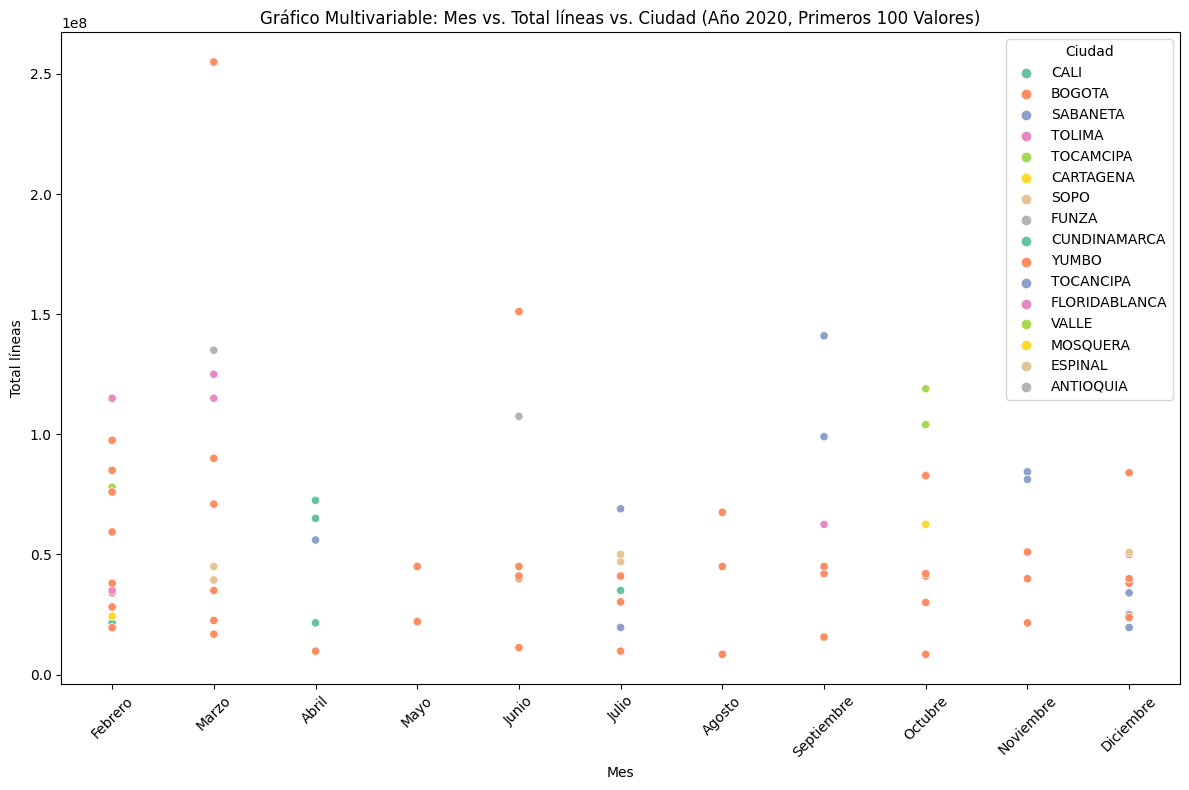

In [84]:
# Convierte la columna 'Fecha de contabilización' al tipo de datos datetime
Operación_df['Fecha de contabilización'] = pd.to_datetime(Operación_df['Fecha de contabilización'], format='%d/%m/%Y')

# Filtra los datos para incluir solo los registros del año 2020
datos_2020 = Operación_df[Operación_df['Fecha de contabilización'].dt.year == 2020]

# Selecciona los primeros 100 valores donde la "Cantidad" es mayor en comparación con "Ciudad" y "Fecha de contabilización"
primeros_100_valores = datos_2020.sort_values(by='Cantidad', ascending=False).head(100)

# Diccionario de nombres de meses en inglés y español
meses_español = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

# Asigna los nombres de los meses en español a los datos
primeros_100_valores['Mes'] = primeros_100_valores['Fecha de contabilización'].dt.strftime('%B').map(meses_español)

# Ordena los datos por los meses en orden de enero a diciembre
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
primeros_100_valores['Mes'] = pd.Categorical(primeros_100_valores['Mes'], categories=meses_ordenados, ordered=True)
primeros_100_valores = primeros_100_valores.sort_values('Mes')

# Crea un gráfico de dispersión (scatterplot) que relacione 'Mes', 'Total líneas' y 'Ciudad'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=primeros_100_valores, x='Mes', y='Total líneas', hue='Ciudad', palette='Set2')
plt.title('Gráfico Multivariable: Mes vs. Total líneas vs. Ciudad (Año 2020, Primeros 100 Valores)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

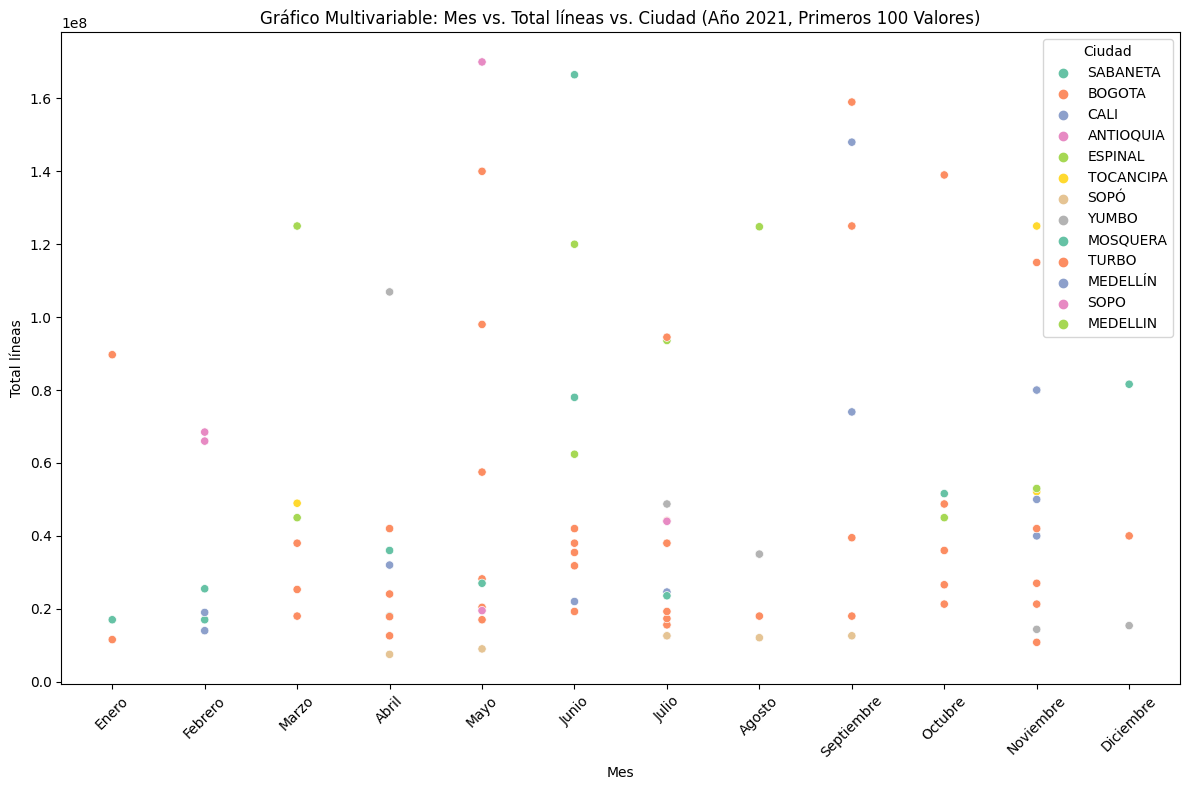

In [82]:
# Convierte la columna 'Fecha de contabilización' al tipo de datos datetime
Operación_df['Fecha de contabilización'] = pd.to_datetime(Operación_df['Fecha de contabilización'], format='%d/%m/%Y')

# Filtra los datos para incluir solo los registros del año 2021
datos_2021 = Operación_df[Operación_df['Fecha de contabilización'].dt.year == 2021]

# Selecciona los primeros 100 valores donde la "Cantidad" es mayor en comparación con "Ciudad" y "Fecha de contabilización"
primeros_100_valores = datos_2021.sort_values(by='Cantidad', ascending=False).head(100)

# Diccionario de nombres de meses en inglés y español
meses_español = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

# Asigna los nombres de los meses en español a los datos
primeros_100_valores['Mes'] = primeros_100_valores['Fecha de contabilización'].dt.strftime('%B').map(meses_español)

# Ordena los datos por los meses en orden de enero a diciembre
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
primeros_100_valores['Mes'] = pd.Categorical(primeros_100_valores['Mes'], categories=meses_ordenados, ordered=True)
primeros_100_valores = primeros_100_valores.sort_values('Mes')

# Crea un gráfico de dispersión (scatterplot) que relacione 'Mes', 'Total líneas' y 'Ciudad'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=primeros_100_valores, x='Mes', y='Total líneas', hue='Ciudad', palette='Set2')
plt.title('Gráfico Multivariable: Mes vs. Total líneas vs. Ciudad (Año 2021, Primeros 100 Valores)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

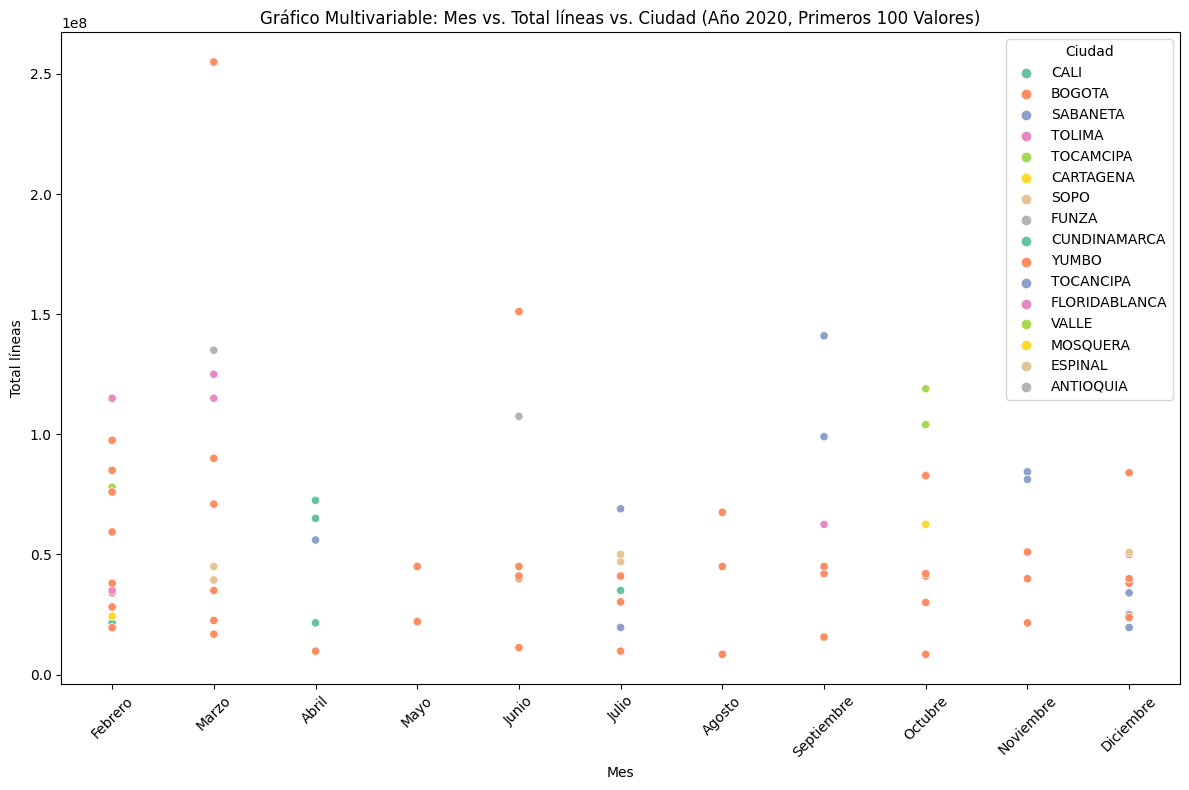